Tutorial 08

1. Plot the histogram of the background (as you did in the Astropy1 tutorial). Do you see any changes? Can you track down in which step the change came about?

2. There are a lot more aspects to image reduction than the steps here. Read up about these steps (which include cosmic ray removal, astrometry and possibly stacking) in the resources given below.

3. The main purpose of the GROWTH-India Telescope is to find transients. These can be anything from Supernova (and other magnitudes of Novae) to afterglows of Gamma Ray Bursts, to Electromagnetic Counterparts of Gravitational Wave Sources. To keep in line with this, let us try to use a technique known as Image Subtraction, albeit with some simplifications (OK, that was a lie. Lots of simplification). Read more below

In [1]:
%matplotlib inline

import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import glob
import os

In [2]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten() # converts a multi-dimensional array into a one-dimensional array
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

Background count estimation for the master bias frame

In [3]:
masterBias = fits.open('masterBias.fits')[0].data
masterBias

array([[445., 431., 429., ..., 448., 449., 454.],
       [426., 436., 433., ..., 443., 438., 436.],
       [437., 434., 429., ..., 445., 437., 458.],
       ...,
       [446., 429., 436., ..., 443., 443., 451.],
       [428., 437., 431., ..., 452., 435., 449.],
       [436., 434., 427., ..., 448., 452., 435.]], dtype='>f8')

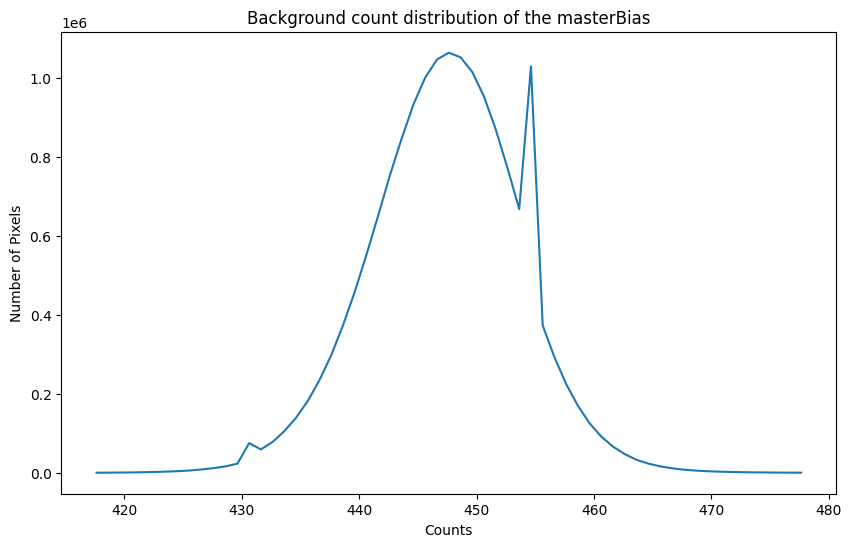

In [4]:
mean, median, std = sigma_clipped_stats(masterBias)

min_count = median - 5*std
max_count = median + 5*std

bins, num_pixels = get_background_histogram(masterBias, min_count, max_count)

plt.figure(figsize = (10,6))
plt.title("Background count distribution of the masterBias")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)

The above background count distribution has some spikes common to the background count distribution of tutorial 05.

Background count for the master flat frame

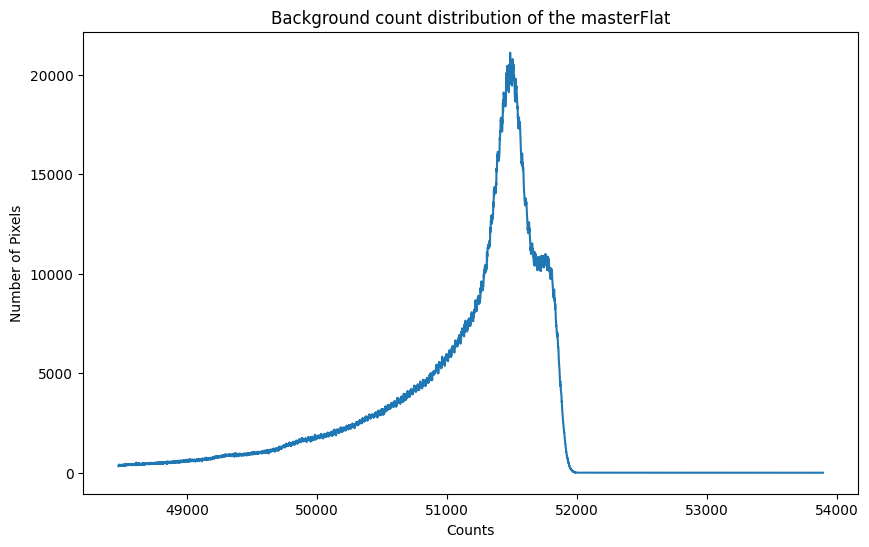

In [5]:
Flat = fits.open('Flat.fits')[1].data # The Flat here is already median combination of multiple flats.
# To create the master flat, we just have to subtract the master bias.

masterFlat = Flat - masterBias
mean, median, std = sigma_clipped_stats(masterFlat)

min_count = mean - 5*std
max_count = mean + 5*std

bins, num_pixels = get_background_histogram(masterFlat, min_count, max_count)

plt.figure(figsize = (10,6))
plt.title("Background count distribution of the masterFlat")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()

Not much resemblence to the tutorial 05 distribution except the one prominent peak.

Background count for the final reduced image

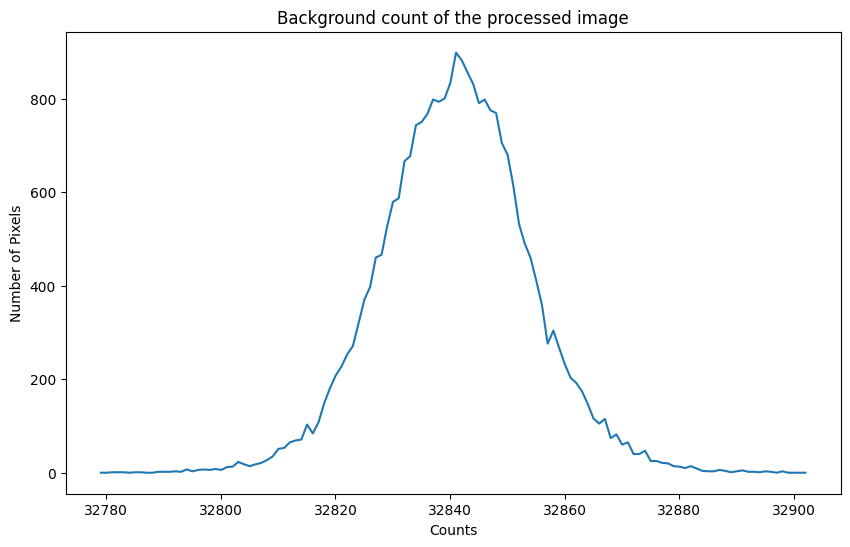

In [6]:
# For the background count estimation , we choose a relatively empty section on the image.

M3_data = fits.open('Messier3.proc.fits')[0].data
M3_data_bkg = M3_data[3100:3275, 2300:2450]

mean, median, std = sigma_clipped_stats(M3_data_bkg)

min_count = mean - 5*std
max_count = mean + 5*std

bins, num_pixels = get_background_histogram(M3_data_bkg, min_count, max_count)

plt.figure(figsize = (10,6))
plt.title("Background count of the processed image")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()

The peaks here do not directly resemble the ones in tutorial 05 distribution but the distribution is approaching gaussian.

---------------------------------------------------------------------------------------------------------------------------

Part 02

There are a lot more aspects to image reduction than the steps here. Read up about these steps (which include cosmic ray removal, astrometry and possibly stacking) in the resources given below.

In [7]:
M3_trans_data = fits.open('Messier3_transient.proc.fits')[0].data

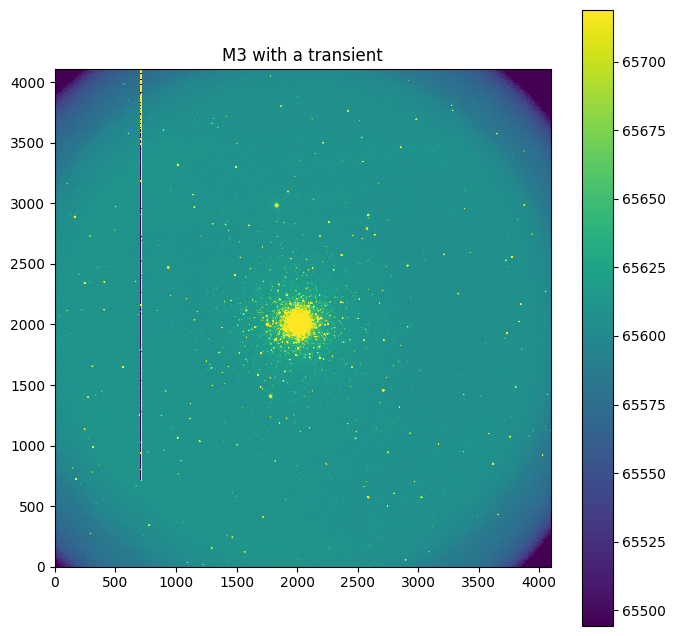

In [8]:
plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(M3_trans_data)
plt.imshow(M3_trans_data, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("M3 with a transient")
plt.colorbar()

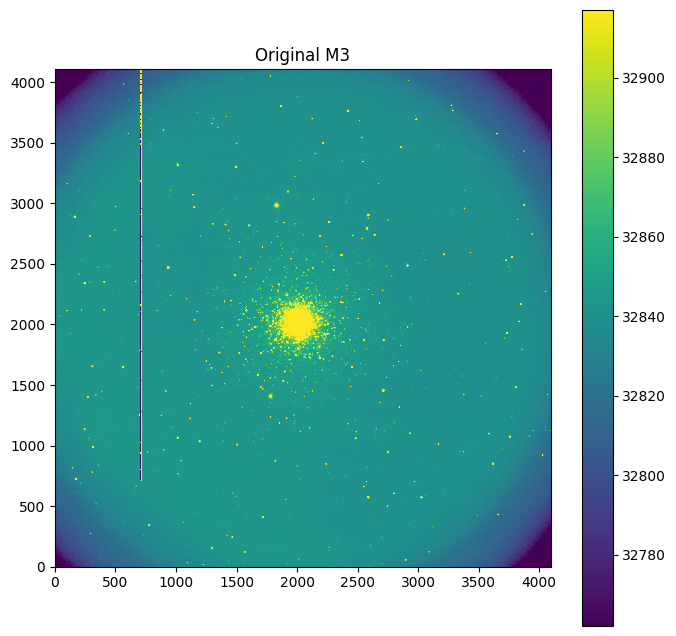

In [9]:
plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(M3_data)
plt.imshow(M3_data, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("Original M3")
plt.colorbar()

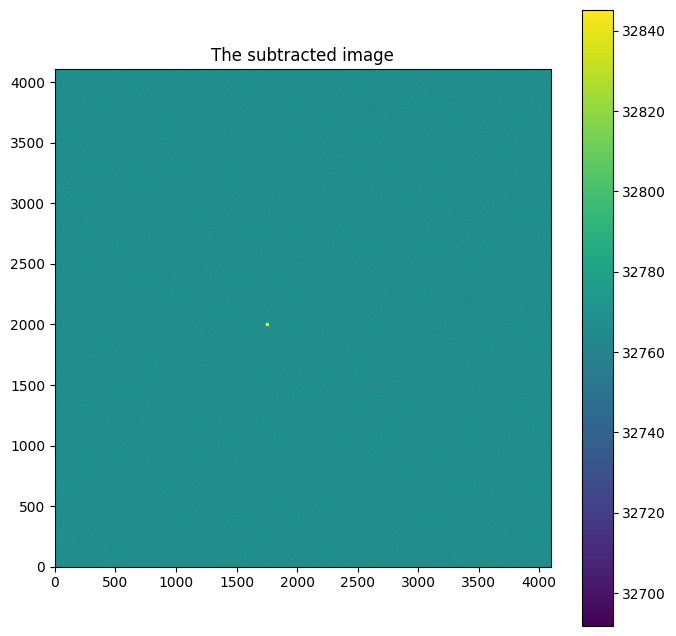

In [10]:
sub_image = M3_trans_data - M3_data
mean, median, std = sigma_clipped_stats(sub_image)

plt.figure(figsize = (8,8))
mean, median, std = sigma_clipped_stats(sub_image)
plt.imshow(sub_image, vmin = median - 5*std, vmax = median + 5*std, origin = "lower")
plt.title("The subtracted image")
plt.colorbar()